In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("lung.csv")
print(new_data.shape)

(205, 12601)


In [3]:
new_data.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09


In [4]:
df = new_data.iloc[2:,:] # Removes first two tubles
print('Required data set ')
df.head()

Required data set 


,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,AD,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,AD,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [5]:
df.isnull().sum()

class          0
38691_s_at     0
37864_s_at     0
33273_f_at     0
33274_f_at     0
              ..
41422_at       0
39964_at       0
36120_at       0
40571_at       0
36312_at       0
Length: 12601, dtype: int64

In [6]:
df.iloc[:,0].unique()
df[df.columns[0]] = pd.factorize(df[df.columns[0]])[0]
df.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,0,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,0,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,0,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,0,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,0,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [7]:
feature_set = df.iloc[:,1:]
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['38691_s_at ', '37864_s_at ', '33273_f_at ', '33274_f_at ', '33501_r_at ', '33500_i_at ', '33499_s_at ', '41164_at ', '38194_s_at ', '37004_at ', '40808_at ', '41827_f_at ', '34105_f_at ', '41165_g_at ', '769_s_at ', '33699_at ', '31444_s_at ', '33383_f_at ', '37039_at ', '32052_at ', '32805_at ', '34301_r_at ', '33322_i_at ', '35566_f_at ', '35083_at ', '33377_at ', '34342_s_at ', '32252_at ', '36780_at ', '31687_f_at ', '37383_f_at ', '39248_at ', '34485_r_at ', 'AFFX ', '35905_s_at ', '676_g_at ', '35530_f_at ', '39026_r_at ', '41237_at ', 'AFFX-HUMGAPDH/M33197_5_at ', '32648_at ', '39016_r_at ', '35016_at ', '613_at ', '38784_g_at ', '36130_f_at ', '38126_at ', '36785_at ', 'AFFX-HUMGAPDH/M33197_3_at ', '38582_at ', '31525_s_at ', '32275_at ', '39220_at ', '31477_at ', '33261_at ', '700_s_at ', '37021_at ', '201_s_at ', '41446_f_at ', '37897_s_at ', '31586_f_at ', '35474_s_at ', '2027_at ', '39594_f_at ', '41745_at ', '31557_at ', '38095_i_at ', '40544_g_at ', '390

In [8]:
feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [9]:
target_feature = df.iloc[:,0]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class , dtype: int64

In [10]:
temp_feature_set=StandardScaler().fit_transform(feature_set)

In [11]:
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,-0.921957,0.089114,-0.358903,-0.308779,-1.224893,-1.129251,-1.347017,-0.940166,-0.240499,-1.231893,...,0.029278,0.676299,1.202205,-0.259985,-0.322778,-0.446593,0.474743,0.521697,-0.284627,-0.778784
1,-0.566868,0.941621,1.285483,1.300554,0.995647,1.106711,1.323679,1.577288,0.611542,-0.588631,...,0.764167,-0.102548,-0.203140,0.300033,0.667041,0.493047,0.575154,-0.680777,0.170760,0.970673
2,0.210410,1.217338,1.220395,1.091475,0.415313,0.296740,0.648918,0.107713,0.923282,-0.534910,...,0.063735,-0.177118,-0.877780,0.181972,0.369599,0.313565,-0.152354,-0.170210,-0.103233,-0.248916
3,-0.921615,1.284640,1.309472,1.307123,0.868111,0.682642,0.941947,2.188311,1.105149,1.323253,...,0.472345,0.265087,0.445315,0.279944,0.153813,-0.199728,0.107092,1.200160,0.240210,0.929277
4,0.411684,0.972753,1.099487,1.251929,0.743846,0.688795,0.768647,0.721515,1.256965,1.146115,...,0.437278,-1.210363,0.056858,-0.410189,0.670146,0.181904,-0.090923,-0.361868,-0.218031,-0.055947


In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((162, 12600), (41, 12600))

# Selection of features using F Classification 

In [13]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :1477.7137622833252 seconds


In [14]:
selected_features = list(selected_features)

In [15]:
required_features = selected_features[:500]
print('Length of required features : '+str(len(required_features)))

Length of required features : 500


In [16]:
print(required_features)

['35622_at ', '40662_g_at ', '538_at ', '791_g_at ', '1618_at ', '40540_at ', '36259_at ', '32713_at ', '33654_at ', '1130_at ', '38759_at ', '502_s_at ', '36273_at ', '36758_at ', '39280_at ', '37901_at ', '768_at ', '39319_at ', '34911_r_at ', '33306_at ', '35781_g_at ', '40984_at ', '31702_at ', '34220_at ', '37738_g_at ', '38182_at ', '35308_at ', '295_s_at ', '1719_at ', '38908_s_at ', '40534_at ', '34905_at ', '33184_at ', '38484_at ', '38141_at ', '39548_at ', '786_at ', '40055_s_at ', '39652_at ', '37949_at ', '1309_at ', '36308_at ', '33255_at ', '893_at ', '33091_at ', '1051_g_at ', '39151_at ', '34565_at ', '41115_s_at ', '32671_at ', '33794_g_at ', '39673_i_at ', '34674_at ', '36360_at ', '41435_at ', '34576_at ', '40606_at ', '36630_at ', '37327_at ', '36297_at ', '34208_at ', '41571_at ', '958_s_at ', '40996_s_at ', '32255_i_at ', '38982_at ', '34635_at ', '40669_at ', '34770_at ', '983_at ', '37093_at ', '38071_at ', '40304_at ', '36516_at ', '39597_at ', '31665_s_at ', 

In [17]:
X_train = X_train[required_features]
X_train.head()

,35622_at,40662_g_at,538_at,791_g_at,1618_at,40540_at,36259_at,32713_at,33654_at,1130_at,...,31626_i_at,38203_at,1076_at,33170_at,38432_at,34276_at,33968_at,38211_at,35837_at,2071_s_at
116,-0.542745,0.243292,0.761627,-1.575206,-1.536989,-1.519358,-2.034096,-1.340709,-1.714951,-1.371724,...,-0.849102,-1.446281,-1.429184,-1.421706,-0.527562,-2.018466,-1.416094,0.531939,-0.514351,-1.188925
55,-0.747186,-0.871073,-0.605466,-1.084097,-1.180311,-0.681321,-0.458068,-0.899116,-0.658631,-0.320983,...,-1.319189,-0.851196,-1.084870,-0.685157,0.039277,-0.368554,-0.826647,-0.570462,-0.385998,-1.045452
26,-0.164536,0.625460,0.701580,0.511199,0.829818,0.528452,0.422725,-0.565567,0.636150,0.282208,...,0.623383,-0.096101,0.490954,0.535748,-0.212291,1.309873,0.485350,0.493010,0.133214,0.950635
130,-1.098536,-0.078120,-0.543308,0.054740,-0.322810,0.662665,-0.443609,0.037645,-0.560856,-0.500919,...,-0.992962,0.125183,0.013847,0.788758,0.742862,-1.004994,-0.733811,-0.904455,-0.127912,-0.447423
177,-1.027548,-0.172262,-0.726220,-1.190819,-0.702636,0.023806,-0.765080,0.262252,0.053979,0.163189,...,0.790039,-0.152878,-0.796861,-0.500952,-0.371745,0.937594,-1.259505,-0.837435,-0.209704,-0.764429


In [18]:
X_test = X_test[required_features]
X_test.head()

,35622_at,40662_g_at,538_at,791_g_at,1618_at,40540_at,36259_at,32713_at,33654_at,1130_at,...,31626_i_at,38203_at,1076_at,33170_at,38432_at,34276_at,33968_at,38211_at,35837_at,2071_s_at
18,-0.639414,-0.898238,-0.949384,-0.866031,-0.661865,-1.079118,-0.567233,-1.288480,-0.588609,0.912512,...,-0.952146,-0.925623,-0.946845,-0.910100,0.239824,-0.980439,-0.834476,-0.698308,-0.361405,-0.623006
45,-0.405648,0.328103,-0.028355,0.490177,0.494446,0.279201,0.924933,-0.737497,0.516812,-0.468523,...,0.199196,0.837654,0.380335,-0.102567,2.277289,0.439372,0.234807,-1.080853,0.002029,1.558912
33,-0.223805,3.544084,-0.272238,0.367054,0.473140,1.103835,0.205599,-0.009653,0.681195,0.191711,...,0.519878,-0.254446,1.075193,0.645427,-0.021624,0.441749,0.762178,-0.758250,0.222052,1.901424
37,-0.114576,0.778286,-0.291374,0.953797,1.180709,0.750899,0.907341,-0.397896,1.418143,1.364288,...,1.783197,1.118879,1.184317,0.873231,-0.207867,0.177589,1.110030,0.181356,0.210999,0.665285
109,0.091322,0.632303,-1.199074,0.663197,1.107585,0.642189,0.896256,-0.670473,0.004450,0.009663,...,0.400354,0.562756,1.302909,-0.682705,-0.395977,1.612846,1.546803,0.668633,0.257007,0.237145


In [19]:
y_train.shape, y_test.shape

((162,), (41,))

# Sequential Forward Search

In [28]:
forward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 100,
                                             forward= True,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.4s finished

[2020-10-20 19:56:31] Features: 1/100 -- score: 0.7839506172839505[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    2.4s finished

[2020-10-20 19:56:34] Features: 2/100 -- score: 0.8395061728395062[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    2.2s finished

[2020-10-20 19:56:36] Features: 3/100 -- score: 0.9135802469135803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 497 ou

[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    2.9s finished

[2020-10-20 19:58:14] Features: 31/100 -- score: 0.9814814814814815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 469 out of 469 | elapsed:    3.6s finished

[2020-10-20 19:58:18] Features: 32/100 -- score: 0.9814814814814815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 461 out of 468 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:    5.4s finished

[2020-10-20 19:58:23] Features: 33/100 -- score: 0.9814814814814815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    3.7s finished

[2020-10-20 20:00:14] Features: 60/100 -- score: 0.9691358024691358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    5.5s finished

[2020-10-20 20:00:20] Features: 61/100 -- score: 0.9691358024691358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 439 out of 439 | elapsed:    8.0s finished

[2020-10-20 20:00:28] Features: 62/100 -- score: 0.9691358024691358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 438 out of 438 | 

[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 412 out of 412 | elapsed:    4.9s finished

[2020-10-20 20:03:04] Features: 89/100 -- score: 0.9691358024691358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 411 out of 411 | elapsed:   10.8s finished

[2020-10-20 20:03:15] Features: 90/100 -- score: 0.9691358024691358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 410 out of 410 | elapsed:    6.4s finished

[2020-10-20 20:03:21] Features: 91/100 -- score: 0.9691358024691358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 409 out of 409 | 

In [29]:
print('Time taken by Forward Feature Selection is :'+str(int(time.time() - forward_start_time))+' seconds')

Time taken by Forward Feature Selection is :501 seconds


In [30]:
feature_selector.k_feature_names_

('35622_at ',
 '538_at ',
 '791_g_at ',
 '1618_at ',
 '40540_at ',
 '36259_at ',
 '32713_at ',
 '502_s_at ',
 '39280_at ',
 '37901_at ',
 '768_at ',
 '34911_r_at ',
 '33306_at ',
 '35781_g_at ',
 '34220_at ',
 '38182_at ',
 '35308_at ',
 '40534_at ',
 '34905_at ',
 '38484_at ',
 '38141_at ',
 '39652_at ',
 '37949_at ',
 '1309_at ',
 '33255_at ',
 '893_at ',
 '33091_at ',
 '39151_at ',
 '41115_s_at ',
 '32671_at ',
 '34674_at ',
 '41435_at ',
 '37327_at ',
 '34208_at ',
 '40996_s_at ',
 '38982_at ',
 '983_at ',
 '37093_at ',
 '40304_at ',
 '39597_at ',
 '34982_at ',
 '37300_at ',
 '35148_at ',
 '34489_f_at ',
 '37635_at ',
 '34984_at ',
 '39990_at ',
 '33599_at ',
 '39701_at ',
 '35435_s_at ',
 '36340_at ',
 '37621_at ',
 '33566_at ',
 '216_at ',
 '40073_at ',
 '32931_at ',
 '31596_f_at ',
 '39236_s_at ',
 '36442_g_at ',
 '202_at ',
 '32656_at ',
 '31403_at ',
 '37704_at ',
 '844_at ',
 '36444_s_at ',
 '36315_i_at ',
 '41746_at ',
 '32937_at ',
 '33154_at ',
 '41791_at ',
 '38765_at ',


In [31]:
feature_columns = list(feature_selector.k_feature_idx_)

In [32]:
X_train2=X_train.iloc[:, feature_columns]
X_train2.head()

,35622_at,538_at,791_g_at,1618_at,40540_at,36259_at,32713_at,502_s_at,39280_at,37901_at,...,32091_at,31684_at,33482_at,38449_at,31809_at,37714_at,36421_at,40560_at,39771_at,33776_at
116,-0.542745,0.761627,-1.575206,-1.536989,-1.519358,-2.034096,-1.340709,-1.408911,-0.886820,-0.677078,...,0.923944,-0.601389,-1.729998,-1.042638,-0.869507,-0.916650,-1.594630,2.514077,-0.840410,-1.697039
55,-0.747186,-0.605466,-1.084097,-1.180311,-0.681321,-0.458068,-0.899116,-1.444315,-0.598818,-1.201820,...,-0.485433,0.249783,-0.454623,-1.044225,-1.129755,-0.219846,-1.133039,-0.099705,0.104315,-0.999246
26,-0.164536,0.701580,0.511199,0.829818,0.528452,0.422725,-0.565567,0.886453,0.789847,0.502286,...,0.135783,-0.675008,0.647807,-0.798089,0.602408,0.022860,0.200518,0.922052,0.378160,1.061491
130,-1.098536,-0.543308,0.054740,-0.322810,0.662665,-0.443609,0.037645,0.001070,-0.843456,-0.180829,...,0.112016,-0.841977,-0.215924,0.147666,-0.474258,-0.212580,0.014181,-0.995523,-0.523803,-0.213681
177,-1.027548,-0.726220,-1.190819,-0.702636,0.023806,-0.765080,0.262252,-1.049250,-0.539091,-0.699397,...,-0.941055,1.840747,-1.309670,1.824423,-0.498384,-0.157396,-0.949972,-0.692483,-0.785471,-0.857164


In [33]:
X_test2=X_test.iloc[:, feature_columns]
X_test2.head()

,35622_at,538_at,791_g_at,1618_at,40540_at,36259_at,32713_at,502_s_at,39280_at,37901_at,...,32091_at,31684_at,33482_at,38449_at,31809_at,37714_at,36421_at,40560_at,39771_at,33776_at
18,-0.639414,-0.949384,-0.866031,-0.661865,-1.079118,-0.567233,-1.288480,-0.458621,-0.937138,-0.243750,...,-0.949750,1.169164,-0.535513,-0.619658,-0.857444,-0.207909,-1.185344,-0.923984,-1.233762,-0.261682
45,-0.405648,-0.028355,0.490177,0.494446,0.279201,0.924933,-0.737497,0.507124,0.401005,0.134016,...,-0.421282,0.265508,0.588008,-0.203201,0.424803,-0.325975,0.263066,-0.043941,0.602164,0.473140
33,-0.223805,-0.272238,0.367054,0.473140,1.103835,0.205599,-0.009653,0.945741,0.295868,1.133163,...,0.556045,-0.500026,-0.564295,0.158774,0.674015,-0.073669,1.174914,-0.300083,0.797000,0.751819
37,-0.114576,-0.291374,0.953797,1.180709,0.750899,0.907341,-0.397896,1.017111,0.540505,0.380479,...,0.910805,1.014816,0.256510,-0.643813,0.864966,0.313483,0.564255,-0.400187,1.151555,-0.072696
109,0.091322,-1.199074,0.663197,1.107585,0.642189,0.896256,-0.670473,1.773522,0.011548,0.535290,...,-0.574316,0.494978,0.970621,0.209552,0.958389,0.014902,0.795704,-0.163656,0.842877,0.822037


In [34]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [36]:
temp_fscore=0
temp_cm = np.zeros([5,5])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 80.4878
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 96.2963
Testing accuracy on selected features for 2 neighbors: 80.4878
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.9136
Testing accuracy on selected features for 3 neighbors: 82.9268
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 95.0617
Testing accuracy on selected features for 4 neighbors: 80.4878
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 95.0617
Testing accuracy on selected features for 5 neighbors: 82.9268
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 91.9753
Testing accuracy on selected features for 6 neighbors: 80.4878
KNN Classfier for 7 neighbors:
Training accuracy on

In [37]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 1  0  1  0  0]
 [ 2  0  0  1  0]
 [ 1  0  0  0  2]]
Average Confusion matrix is : [[28.94736842  0.          0.          0.05263158  0.        ]
 [ 3.          1.          0.          0.          0.        ]
 [ 1.73684211  0.          0.26315789  0.          0.        ]
 [ 2.26315789  0.          0.          0.73684211  0.        ]
 [ 0.73684211  0.          0.          0.          2.26315789]]


Confusion Matrix of KNN Classifier:


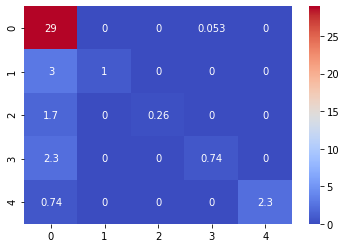

In [38]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [39]:
f_score_knn = f1_score(y_test2, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8292682926829268
Average F-Score is : 0.8100128369704749


# SVM(Support Vector Machine)

In [40]:
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.1481
Testing accuracy on selected features: 82.9268


In [41]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print(cm_svc)

[[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 2  0  0  0  0]
 [ 2  0  0  1  0]
 [ 0  0  0  0  3]]


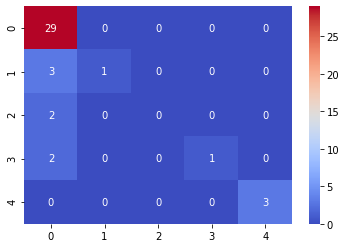

In [42]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [43]:
f_score_knn = f1_score(y_test2, y_test_prediction_svc, average='micro')

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.8292682926829268


# Backward Feature Selection

In [44]:
backward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 400,
                                             forward= False,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.1s finished

[2020-10-20 20:05:57] Features: 499/400 -- score: 0.8641975308641975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 492 out of 499 | elapsed:   18.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:   18.5s finished

[2020-10-20 20:06:16] Features: 498/400 -- score: 0.8641975308641975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 300 tasks  

[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   34.5s finished

[2020-10-20 20:13:00] Features: 479/400 -- score: 0.8765432098765431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 479 out of 479 | elapsed:   20.3s finished

[2020-10-20 20:13:20] Features: 478/400 -- score: 0.8765432098765431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 471 out of 478 | elapsed:   16.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed:   17.0s finished

[2020-10-20 20:13:38] Features: 477/400 -- score: 0.8765432098765431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 458 out of 458 | elapsed:  1.1min finished

[2020-10-20 20:27:09] Features: 457/400 -- score: 0.8765432098765431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 457 out of 457 | elapsed:   55.7s finished

[2020-10-20 20:28:05] Features: 456/400 -- score: 0.8765432098765431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 456 out of 456 | elapsed:  1.3min finished



[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 430 out of 437 | elapsed:   27.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 437 out of 437 | elapsed:   27.9s finished

[2020-10-20 20:46:48] Features: 436/400 -- score: 0.882716049382716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 436 out of 436 | elapsed:   28.7s finished

[2020-10-20 20:47:17] Features: 435/400 -- score: 0.882716049382716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed:  

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 416 out of 416 | elapsed:   57.5s finished

[2020-10-20 21:02:16] Features: 415/400 -- score: 0.8888888888888888[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 415 out of 415 | elapsed:   57.7s finished

[2020-10-20 21:03:13] Features: 414/400 -- score: 0.8888888888888888[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 414 out of 414 | elapsed:   58.4s finished

[2020-10-20 21:04:12] Features: 413/400 -- score: 0.8888888888

In [45]:
print('Time taken by Backward Feature Selection is :'+str(int(time.time() - backward_start_time))+' seconds')

Time taken by Backward Feature Selection is :4217 seconds


In [46]:
feature_selector.k_feature_names_

('35622_at ',
 '40662_g_at ',
 '538_at ',
 '791_g_at ',
 '1618_at ',
 '40540_at ',
 '36259_at ',
 '32713_at ',
 '33654_at ',
 '1130_at ',
 '38759_at ',
 '502_s_at ',
 '36273_at ',
 '36758_at ',
 '39280_at ',
 '37901_at ',
 '768_at ',
 '39319_at ',
 '34911_r_at ',
 '33306_at ',
 '35781_g_at ',
 '40984_at ',
 '31702_at ',
 '34220_at ',
 '37738_g_at ',
 '38182_at ',
 '35308_at ',
 '295_s_at ',
 '1719_at ',
 '38908_s_at ',
 '40534_at ',
 '34905_at ',
 '33184_at ',
 '38484_at ',
 '38141_at ',
 '39548_at ',
 '786_at ',
 '40055_s_at ',
 '39652_at ',
 '37949_at ',
 '1309_at ',
 '36308_at ',
 '33255_at ',
 '893_at ',
 '33091_at ',
 '1051_g_at ',
 '39151_at ',
 '34565_at ',
 '41115_s_at ',
 '32671_at ',
 '33794_g_at ',
 '39673_i_at ',
 '34674_at ',
 '36360_at ',
 '41435_at ',
 '34576_at ',
 '40606_at ',
 '36630_at ',
 '37327_at ',
 '36297_at ',
 '34208_at ',
 '41571_at ',
 '958_s_at ',
 '40996_s_at ',
 '32255_i_at ',
 '38982_at ',
 '34635_at ',
 '40669_at ',
 '34770_at ',
 '983_at ',
 '37093_at 

In [47]:
feature_columns = list(feature_selector.k_feature_idx_)
print(feature_columns)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,

In [48]:
X_train3=X_train.iloc[:, feature_columns]
X_train3.head()

,35622_at,40662_g_at,538_at,791_g_at,1618_at,40540_at,36259_at,32713_at,33654_at,1130_at,...,39269_at,31459_i_at,33958_at,37904_s_at,39575_at,31331_at,33470_at,33776_at,40623_at,34730_g_at
116,-0.542745,0.243292,0.761627,-1.575206,-1.536989,-1.519358,-2.034096,-1.340709,-1.714951,-1.371724,...,-1.420091,-1.574900,-1.462043,0.106608,-1.078711,-1.485153,-1.106378,-1.697039,-1.238860,-0.640593
55,-0.747186,-0.871073,-0.605466,-1.084097,-1.180311,-0.681321,-0.458068,-0.899116,-0.658631,-0.320983,...,-1.019304,-0.991977,-1.162416,-0.556834,-1.245235,-1.014428,-0.661447,-0.999246,-0.190672,-0.736023
26,-0.164536,0.625460,0.701580,0.511199,0.829818,0.528452,0.422725,-0.565567,0.636150,0.282208,...,0.521789,0.418913,0.491892,0.169289,0.615278,0.295357,0.762403,1.061491,-0.681751,-0.335700
130,-1.098536,-0.078120,-0.543308,0.054740,-0.322810,0.662665,-0.443609,0.037645,-0.560856,-0.500919,...,-0.186988,-0.300026,-0.300753,-0.666204,-0.568643,-0.328287,1.081011,-0.213681,1.181986,-0.222363
177,-1.027548,-0.172262,-0.726220,-1.190819,-0.702636,0.023806,-0.765080,0.262252,0.053979,0.163189,...,-0.060604,-0.817640,-0.317242,-0.233625,-0.455954,-1.275587,1.284843,-0.857164,-0.609160,0.166022


In [49]:
X_test3=X_test.iloc[:, feature_columns]
X_test3.head()

,35622_at,40662_g_at,538_at,791_g_at,1618_at,40540_at,36259_at,32713_at,33654_at,1130_at,...,39269_at,31459_i_at,33958_at,37904_s_at,39575_at,31331_at,33470_at,33776_at,40623_at,34730_g_at
18,-0.639414,-0.898238,-0.949384,-0.866031,-0.661865,-1.079118,-0.567233,-1.288480,-0.588609,0.912512,...,-0.158523,-0.837880,-0.832874,-0.328421,-0.662171,-0.770555,-0.872190,-0.261682,-0.433806,-0.628926
45,-0.405648,0.328103,-0.028355,0.490177,0.494446,0.279201,0.924933,-0.737497,0.516812,-0.468523,...,0.188560,0.163614,0.022430,0.213656,0.322149,0.343493,0.512643,0.473140,0.264985,-0.550552
33,-0.223805,3.544084,-0.272238,0.367054,0.473140,1.103835,0.205599,-0.009653,0.681195,0.191711,...,0.960340,1.109785,1.268991,0.855688,1.102990,0.719009,0.890651,0.751819,0.417600,-0.370662
37,-0.114576,0.778286,-0.291374,0.953797,1.180709,0.750899,0.907341,-0.397896,1.418143,1.364288,...,0.767537,1.192365,1.131898,-0.058995,0.894492,1.363131,0.227366,-0.072696,-0.527387,-0.389965
109,0.091322,0.632303,-1.199074,0.663197,1.107585,0.642189,0.896256,-0.670473,0.004450,0.009663,...,0.768676,1.540500,0.938271,-0.017981,1.288677,0.921128,-0.083369,0.822037,-0.335853,0.502312


In [50]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test3 = np.array([a+1 for a in y_test])

print(y_test2)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [51]:
temp_fscore=0
temp_cm = np.zeros([5,5])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 85.3659
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 95.0617
Testing accuracy on selected features for 2 neighbors: 78.0488
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.9136
Testing accuracy on selected features for 3 neighbors: 78.0488
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 91.3580
Testing accuracy on selected features for 4 neighbors: 78.0488
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.3580
Testing accuracy on selected features for 5 neighbors: 80.4878
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 89.5062
Testing accuracy on selected features for 6 neighbors: 80.4878
KNN Classfier for 7 neighbors:
Training accuracy on

In [52]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 3.          1.          0.          0.          0.        ]
 [ 1.84210526  0.          0.          0.          0.15789474]
 [ 2.89473684  0.          0.          0.10526316  0.        ]
 [ 0.68421053  0.          0.          0.          2.31578947]]


Confusion Matrix of KNN Classifier:


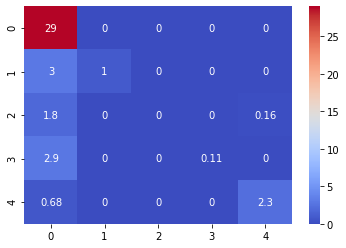

In [53]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [54]:
f_score_knn = f1_score(y_test3, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8536585365853658
Average F-Score is : 0.7907573812580232


# SVM(Support Vector Machine)

In [55]:
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.7654
Testing accuracy on selected features: 80.4878


In [56]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print(cm_svc)

[[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 2  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  0  3]]


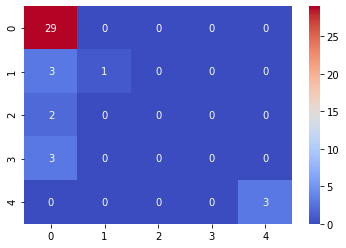

In [57]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [58]:
f_score_knn = f1_score(y_test3, y_test_prediction_svc, average='micro')

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.8048780487804877
